<a href="https://colab.research.google.com/github/sagar2582/Capstone-2-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connecting to Drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Regression Project/SeoulBikeData.csv', encoding= 'unicode_escape')

### Data Inspection 

In [4]:
# First Look

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
print("The shape of our dataset is : ", df.shape)

The shape of our dataset is :  (8760, 14)


In [6]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Our dataset has {rows} and {columns} columns")

Our dataset has 8760 and 14 columns


In [7]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Check for Null values

df.isnull().sum().sort_values(ascending = False)

Functioning Day              0
Holiday                      0
Seasons                      0
Snowfall (cm)                0
Rainfall(mm)                 0
Solar Radiation (MJ/m2)      0
Dew point temperature(°C)    0
Visibility (10m)             0
Wind speed (m/s)             0
Humidity(%)                  0
Temperature(°C)              0
Hour                         0
Rented Bike Count            0
Date                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Check for duplicate values

len(df[df.duplicated()])

0

In [11]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,24/10/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
len(df.Date.unique())

365

In [15]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

### Insights of the above inspection :
1) Our dataset has 8760 and 14 columns

2) We have 0 Duplicate and 0 NULL values

3) We have four (object) Dtypes, six (float) Dtypes and four (int) Dtypes

4) Our Dependent variable is "Rented Bike Count"

5) We have 4 Seasons and count of number of holidays and Non-Functional Days is also obtained

# Pre-Processing of Data 
## Hunt for the Outliers is on

In [18]:
# First we will create a copy of our dataset

df_copy = df.copy()

In [19]:
# Storing Numerical features in one single list

list_numerical_features = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

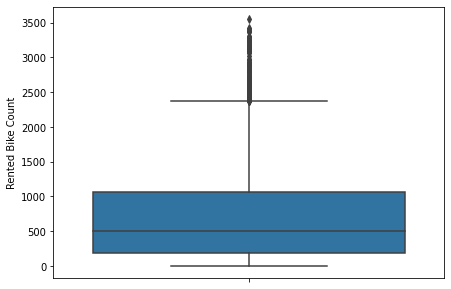

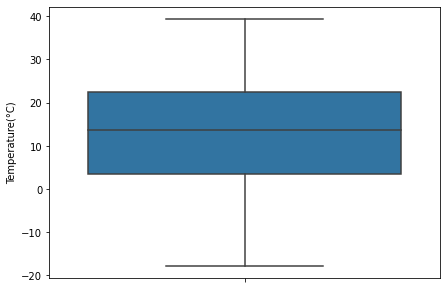

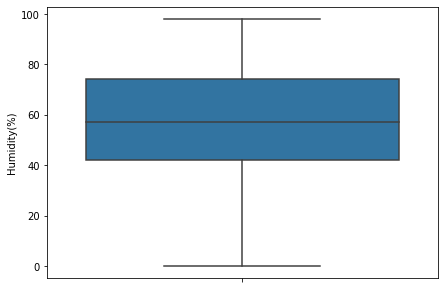

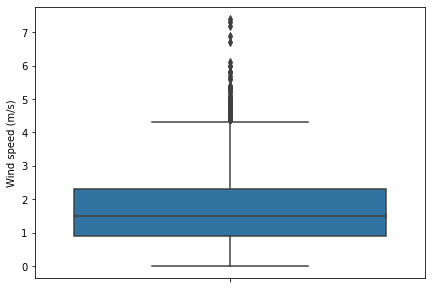

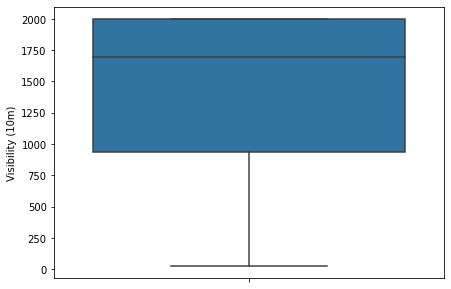

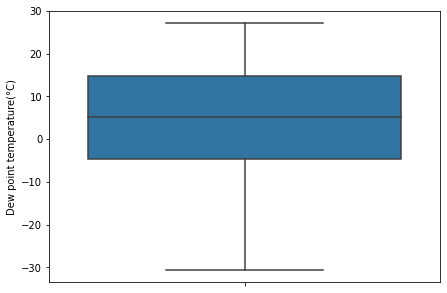

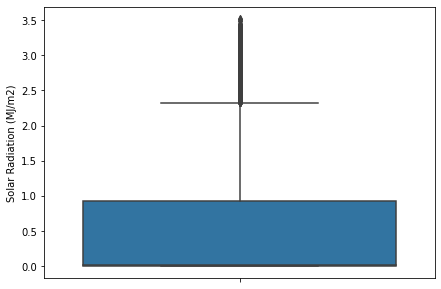

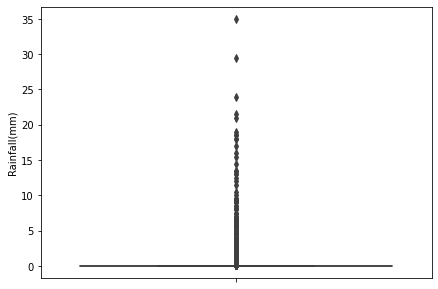

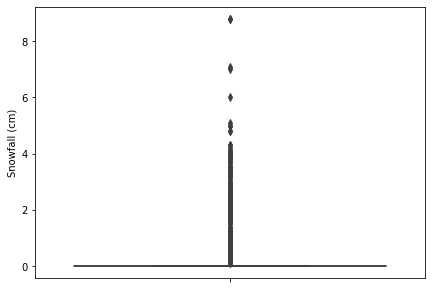

In [20]:
for col in list_numerical_features:
  plt.figure(figsize= (7,5))
  sns.boxplot(y= df_copy[col])

Our dependent variable itself is a stockpile of outliers and other factors like wind, rain should not be considered as of natural factors

In [21]:
df_copy.shape

(8760, 14)

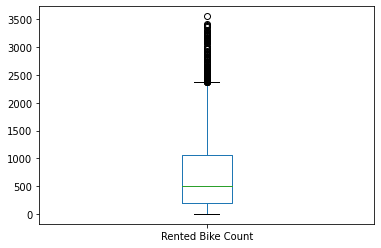

In [22]:
df['Rented Bike Count'].plot(kind='box')

We should be dealing with this using the Inter-Quartile-Range method of removing outliers, for that we need to find Q1 and Q3. And with the help of it we will calculate IQR.

In [23]:
Q1 = df_copy['Rented Bike Count'].quantile(0.25)
Q3 = df_copy['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# The outliers are :

df_copy[(df_copy['Rented Bike Count'] < Q1-1.5*IQR) | (df_copy['Rented Bike Count'] > Q3+1.5*IQR)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2946,02/04/2018,2401,18,20.7,54,4.1,1484,11.0,0.50,0.0,0.0,Spring,No Holiday,Yes
2994,04/04/2018,2402,18,16.0,47,2.1,2000,4.6,0.79,0.0,0.0,Spring,No Holiday,Yes
3114,09/04/2018,2401,18,14.8,24,1.3,1514,-5.6,0.69,0.0,0.0,Spring,No Holiday,Yes
3210,13/04/2018,2404,18,17.5,18,1.3,2000,-7.1,0.23,0.0,0.0,Spring,No Holiday,Yes
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7842,23/10/2018,2415,18,14.5,71,2.1,1235,9.2,0.06,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [25]:
# The total number of outliers are : 

df_copy[(df_copy['Rented Bike Count'] < Q1-1.5*IQR) | (df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count'].count()

158

In [26]:
# Removing the outliers

not_outliers = (df_copy['Rented Bike Count'] >= Q1-1.5*IQR) & (df_copy['Rented Bike Count'] <= Q3+1.5*IQR)
df_copy = df_copy.loc[not_outliers]

In [27]:
df_copy.shape

(8602, 14)

### We have successfully removed the outliers. The rows have reduced from 8760 - 8602 in numbers.

#### Extracting day, month and year from Date column

In [28]:
df_copy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [29]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [30]:
df_copy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [31]:
# Creating columns for Day, Month & Year

df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Day'] = df_copy['Date'].dt.day 

In [32]:
# Drop the main Date column as we no longer need it

df_copy.drop('Date', axis = 1, inplace = True)

In [33]:
df_copy.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


In [34]:
df_copy['Rented Bike Count'].value_counts().sort_index(ascending = True)

0       295
2         3
3         2
4         5
5         3
       ... 
2368      2
2369      1
2370      1
2372      2
2375      1
Name: Rented Bike Count, Length: 2024, dtype: int64

#### Since there are 295 Non-Functional days, therefore; the Rented bike is 0 on those days.

# Exploratory Data Analysis

In [35]:
# Storing all the numeric features seperately

numeric_features = ['Rented Bike Count','Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

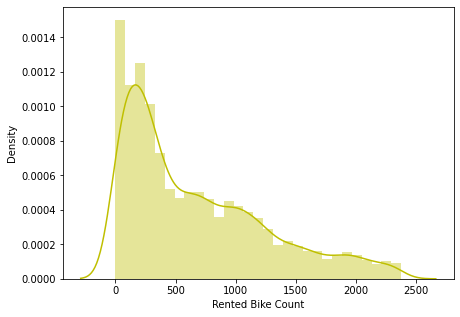

In [36]:
# Dependent variable
plt.figure(figsize=(7,5))
sns.distplot(df_copy['Rented Bike Count'], color = 'y')

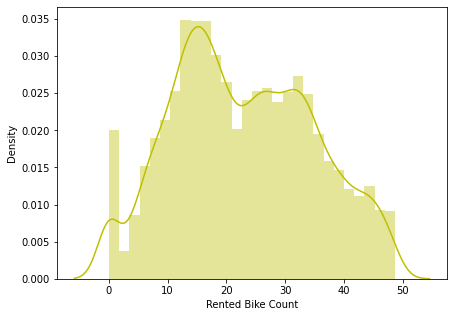

In [37]:
# Its a slightly rightSkewed hence using SQRT to make it a standard distribution

plt.figure(figsize=(7,5))
sns.distplot(np.sqrt(df_copy['Rented Bike Count']), color = 'y')

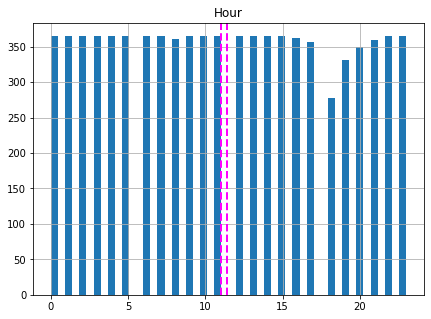

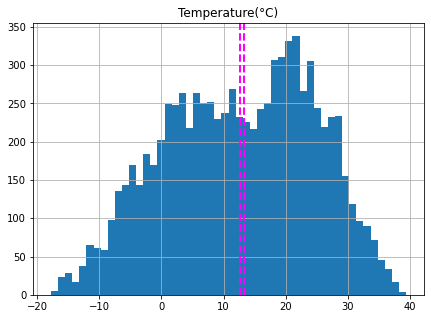

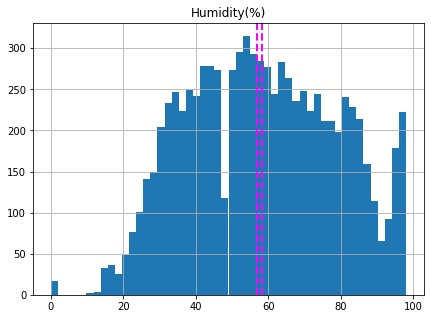

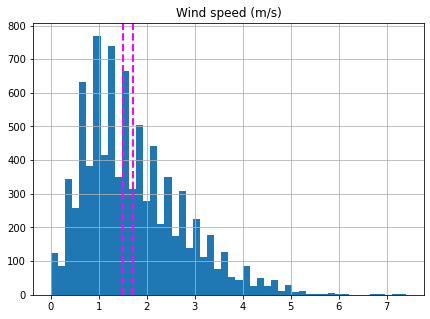

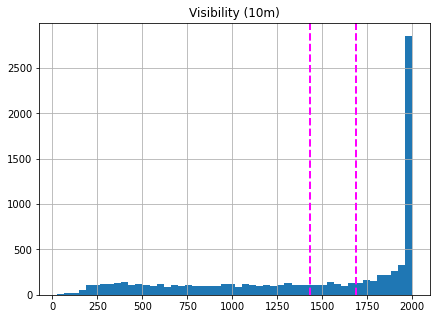

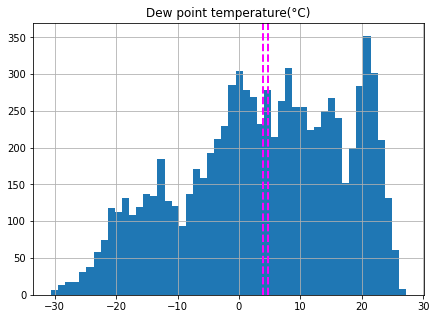

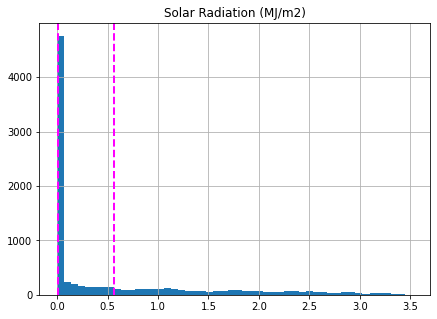

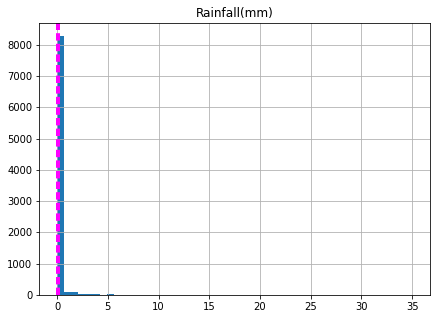

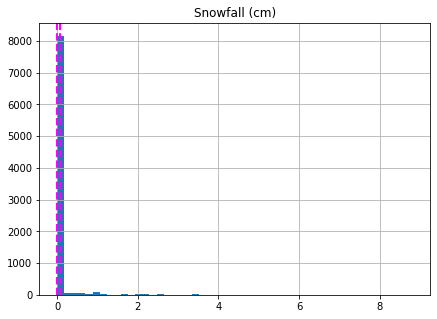

In [38]:
# Distributon check for numerical features 

for col in numeric_features[1:]:
  fig = plt.figure(figsize=(7,5))
  ax = fig.gca()
  feature = df_copy[col]
  feature.hist(bins=50, ax=ax)
  ax.set_title(col)
  ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
plt.show()

#### Rest of the features don't need seprate standardization 

In [39]:
# Renaming columns for the ease of use :


df_copy.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility','Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation',
                   'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [40]:
df_copy.head(1)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


### Looking for some insight through Visualization

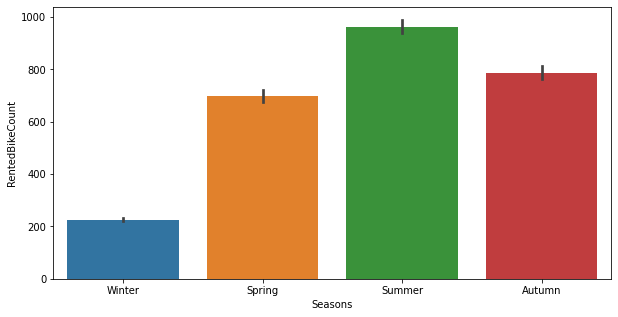

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Seasons'], df_copy['RentedBikeCount'])
plt.show()

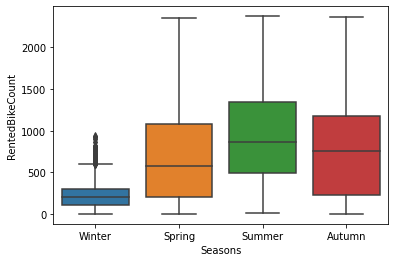

In [42]:
sns.boxplot(x = df_copy['Seasons'], y = df_copy['RentedBikeCount'])
plt.show()

-> Summer Season was the most favorable and popular for the most Rented Bike Count as shown above

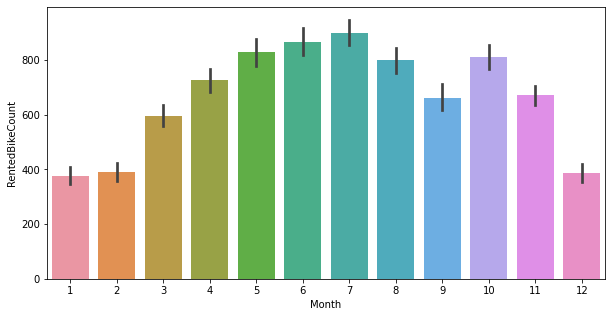

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Month'], df_copy['RentedBikeCount'])

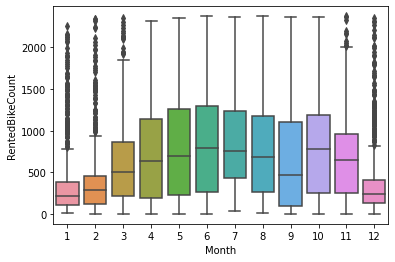

In [44]:
sns.boxplot(x = df_copy['Month'], y = df_copy['RentedBikeCount'])
plt.show()

Since Summer Spring are the best seasons among others for a bike ride, we see that the number of rented bikes increase drastically from 4th month to 8th month. Making it the most demanding season for the bike count.

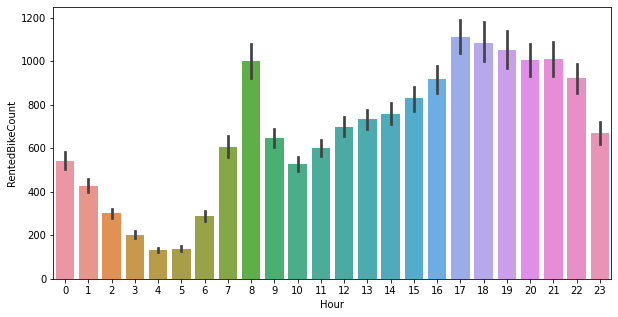

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Hour'], df_copy['RentedBikeCount'])

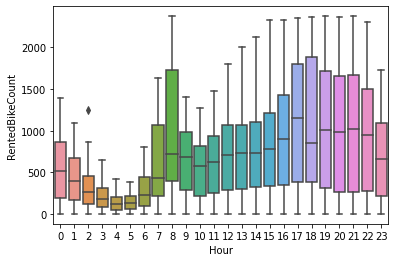

In [46]:
sns.boxplot(x = df_copy['Hour'], y = df_copy['RentedBikeCount'])
plt.show()

From the above 2 graphs we notice that the activity spike during 7-9 hour of the day (i.e., when most of the offices start working) and another spike is from 16-21 hours (i.e., is the time when people after work go back to there home) 

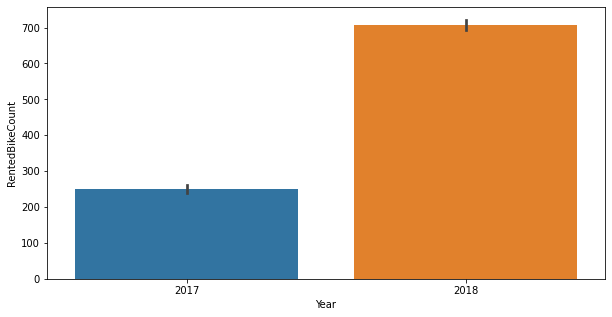

In [47]:
# Yearly Pattern

plt.figure(figsize=(10,5))
sns.barplot(df_copy['Year'], df_copy['RentedBikeCount'])

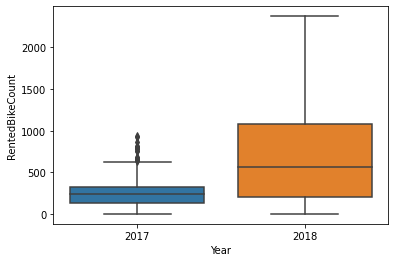

In [48]:
sns.boxplot(x = df_copy['Year'], y = df_copy['RentedBikeCount'])
plt.show()

### The adoption of the rental bikes have drastically increased over the span of an year

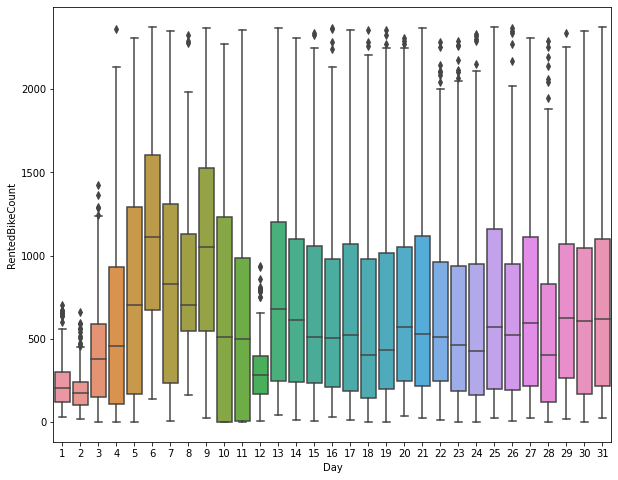

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day", y="RentedBikeCount", data=df_copy)
plt.show()

## Feature Engineering - Label Encoding

We saw that there was a drastic change in yearly trend from 2017 - 2018. We have to do something about it and need to categories accordingly. 
So we will provide labels/weights to the years and create bins.
The year earlier will get lower weightage compared to the one which had spikes in the rental bike count.

Since; there are 4 seasons I'll assume and create bins of 3 months each - Thus; each year will have 4 bins

In [55]:
# Creating a fuction that will take 'Month' & 'Year' as input and return 4 bins of each year

#creating function
def Year_bins(month,year):

  if (year==2017) and (month<=3):
    return 1
  elif (year==2017) and (month>3) and (month<=6):
    return 2
  elif (year==2017) and (month>6) and (month<=9):
    return 3
  elif (year==2017) and (month>9) and (month<=12):
    return 4
  elif (year==2018) and (month<=3):
    return 5
  elif (year==2018) and (month>3) and (month<=6):
    return 6
  elif (year==2018) and (month>6) and (month<=9):
    return 7
  else:
    return 8

In [57]:
# Creating a new column in our dataframe 

df_copy['Yearly_bins'] = df_copy.apply(lambda x:Year_bins(x.Month, x.Year), axis = 1)

In [58]:
# Dropping Date and Year columns as they are of no use now

df_copy.drop('Month',axis=1,inplace=True)
df_copy.drop('Year',axis=1,inplace=True)

In [61]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Day,Yearly_bins
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


## Multicollinearity Check

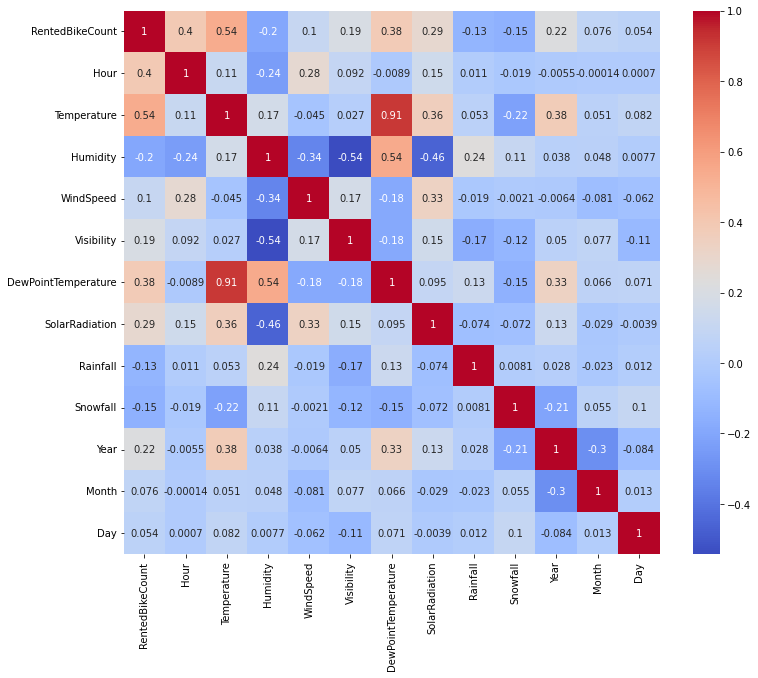

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [52]:
# We will check for multicollinearity using the variance inflation factor

# Importing the VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)